## Introduction

This notebook compares the performance of three widely-used convolutional neural network (CNN) architectures: LeNet-5, AlexNet, and VGG-16, on the CIFAR-10 dataset. CIFAR-10 is a well-known benchmark dataset in the field of computer vision, consisting of 60,000 32x32 color images in 10 classes.

The purpose of this comparison is to evaluate how these different architectures perform on a common task of image classification.

## Setup


### Import necessary libraries

In [19]:
# Import necessary libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
# For machine learning tasks
import tensorflow as tf
# To import CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
# For one-hot encoding
from tensorflow.keras.utils import to_categorical
# For early stopping during training
from tensorflow.keras.callbacks import EarlyStopping
# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

### Load CIFAR-10 dataset

In [9]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Useful Functions

In [10]:
# Function to build and compile model
def build_model(model, input_shape=(32, 32, 3), num_classes=10):

    # Create the model instance
    model_instance = model(input_shape, num_classes)

    # Compile the model
    model_instance.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    # Return model
    return model_instance

In [11]:
# Function to train model with early stopping
def train_model(model, x_train, y_train, epochs = 40, batch_size = 64, validation_split = 0.2, patience = 3, shuffle = True):

  # Define Early stopping callback to stop training when no improvement in validation loss
  early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
    )

  # Train the model with EarlyStopping
  history = model.fit(
    x_train, y_train, # Training data
    batch_size=batch_size, # Batch size
    epochs=epochs,  # Maximum number of epochs
    validation_split = 0.2, # Fraction of training data to use as validation data
    shuffle = True, # Shuffle training data before each epoch
    callbacks=[early_stopping]  # Include early stopping in the callbacks
  )
  return history

In [12]:
# Function to plot training history
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [13]:
# Function to evaluate model performance
def evaluate_model(model, x_test, y_test):
    # Evaluate model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Predict classes for test data
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    # Calculate performance metrics
    print("\nClassification Report:")
    print(classification_report(np.argmax(y_test, axis=-1), y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Model Implementations

In [14]:
# Import model implementations from their respective Python files
from alexnet import AlexNet
from vgg16 import VGG16
from lenet import LeNet5

### LeNet5

In [15]:
# Build and compile LeNet5 model
lenet5_model = build_model(LeNet5)

# View model summary
lenet5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [16]:
# Train LeNet5 model
history_lenet = train_model(lenet5_model, x_train, y_train)

Epoch 1/40
625/625 [==============================] - 9s 6ms/step - loss: 1.8896 - accuracy: 0.2893 - val_loss: 1.5404 - val_accuracy: 0.4528
Epoch 2/40
625/625 [==============================] - 4s 6ms/step - loss: 1.5904 - accuracy: 0.4185 - val_loss: 1.3990 - val_accuracy: 0.4962
Epoch 3/40
625/625 [==============================] - 3s 5ms/step - loss: 1.4798 - accuracy: 0.4659 - val_loss: 1.3513 - val_accuracy: 0.5142
Epoch 4/40
625/625 [==============================] - 3s 5ms/step - loss: 1.4141 - accuracy: 0.4935 - val_loss: 1.2819 - val_accuracy: 0.5400
Epoch 5/40
625/625 [==============================] - 3s 5ms/step - loss: 1.3601 - accuracy: 0.5181 - val_loss: 1.2312 - val_accuracy: 0.5640
Epoch 6/40
625/625 [==============================] - 4s 6ms/step - loss: 1.3159 - accuracy: 0.5290 - val_loss: 1.2081 - val_accuracy: 0.5763
Epoch 7/40
625/625 [==============================] - 3s 5ms/step - loss: 1.2832 - accuracy: 0.5465 - val_loss: 1.1782 - val_accuracy: 0.5867
Epoch 

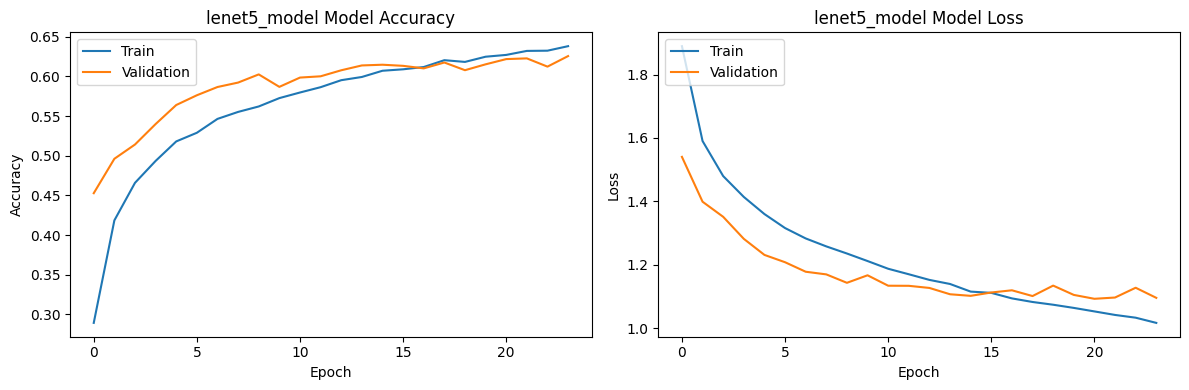

In [17]:
# Plot training history of LeNet
plot_training_history(history_lenet, 'lenet5_model')

Test Accuracy: 0.6165
313/313 [==============================] - 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1000
           1       0.75      0.72      0.73      1000
           2       0.59      0.37      0.45      1000
           3       0.41      0.49      0.45      1000
           4       0.50      0.60      0.55      1000
           5       0.56      0.42      0.48      1000
           6       0.70      0.69      0.70      1000
           7       0.66      0.72      0.69      1000
           8       0.70      0.79      0.74      1000
           9       0.65      0.68      0.67      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.61     10000



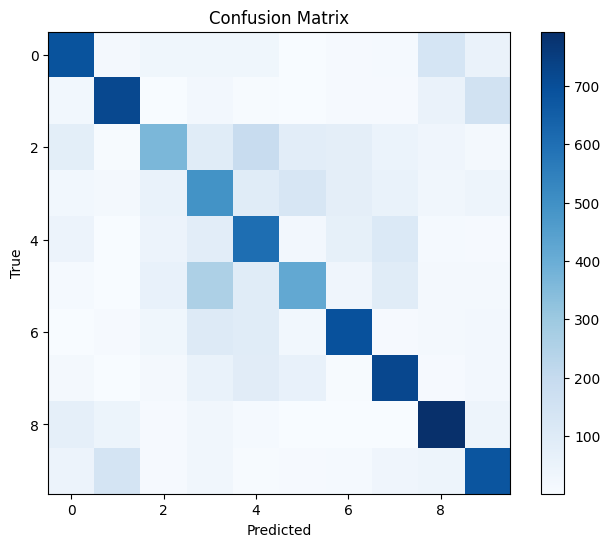

In [20]:
# Evaluate LeNet performance
evaluate_model(lenet5_model, x_test, y_test)

Accuracy and Loss Trends: The training accuracy shows a steady increase and plateaus around 60%, while the validation accuracy remains slightly lower, suggesting some degree of overfitting. The loss graphs for both training and validation decrease over epochs, with validation loss showing signs of leveling off, indicating potential limits in learning further complex patterns from the data.



Model Evaluation: The final test accuracy achieved is 61.72%. The precision, recall, and F1-score across the classes show variability, which can be typical for a basic model like LeNet-5 when applied to a diverse dataset like CIFAR-10. The confusion matrix indicates that the model particularly struggles with certain classes, likely due to limited feature extraction capabilities inherent to its simpler architecture.

### AlexNet

In [21]:
# Build and compile AlexNet model
alexnet_model = build_model(AlexNet)

# View model summary
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 activation (Activation)     (None, 32, 32, 48)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       55424     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [22]:
# Train AlexNet model
history_alexnet = train_model(alexnet_model, x_train, y_train)

Epoch 1/40
625/625 [==============================] - 17s 18ms/step - loss: 1.7337 - accuracy: 0.3444 - val_loss: 1.4208 - val_accuracy: 0.4741
Epoch 2/40
625/625 [==============================] - 7s 10ms/step - loss: 1.2687 - accuracy: 0.5382 - val_loss: 1.1409 - val_accuracy: 0.5962
Epoch 3/40
625/625 [==============================] - 6s 10ms/step - loss: 1.0526 - accuracy: 0.6273 - val_loss: 1.0072 - val_accuracy: 0.6485
Epoch 4/40
625/625 [==============================] - 6s 9ms/step - loss: 0.9187 - accuracy: 0.6764 - val_loss: 0.8760 - val_accuracy: 0.6936
Epoch 5/40
625/625 [==============================] - 6s 10ms/step - loss: 0.8305 - accuracy: 0.7108 - val_loss: 0.8509 - val_accuracy: 0.7048
Epoch 6/40
625/625 [==============================] - 6s 9ms/step - loss: 0.7390 - accuracy: 0.7432 - val_loss: 0.7895 - val_accuracy: 0.7272
Epoch 7/40
625/625 [==============================] - 6s 10ms/step - loss: 0.6605 - accuracy: 0.7690 - val_loss: 0.8210 - val_accuracy: 0.7212


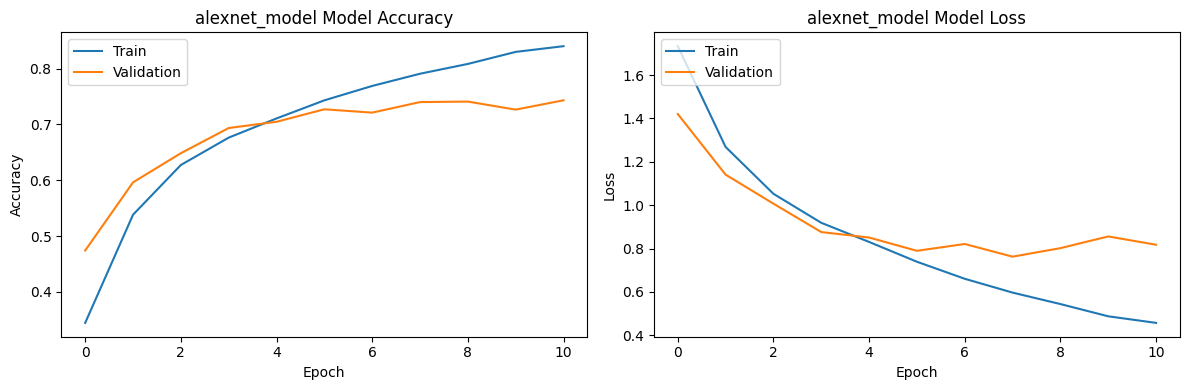

In [23]:
# Plot training history of AlexNet
plot_training_history(history_alexnet, 'alexnet_model')

Test Accuracy: 0.7363
313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1000
           1       0.89      0.79      0.84      1000
           2       0.62      0.66      0.64      1000
           3       0.56      0.56      0.56      1000
           4       0.68      0.70      0.69      1000
           5       0.71      0.58      0.64      1000
           6       0.75      0.82      0.79      1000
           7       0.81      0.78      0.80      1000
           8       0.89      0.79      0.84      1000
           9       0.76      0.88      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



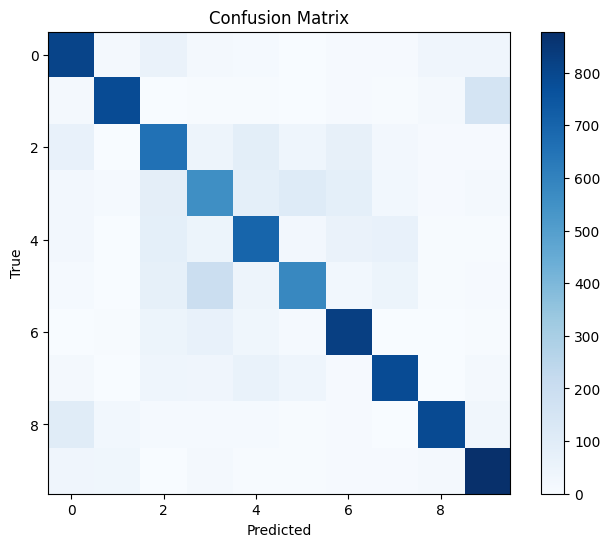

In [24]:
# Evaluate AlexNet performance
evaluate_model(alexnet_model, x_test, y_test)

### VGG16

In [25]:
# Build and compile VGG16 model
vgg16_model = build_model(VGG16)

# View model summary
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [26]:
# Train VGG16 model
history_vgg16 = train_model(vgg16_model, x_train, y_train)

Epoch 1/40
625/625 [==============================] - 11s 12ms/step - loss: 1.8433 - accuracy: 0.3104 - val_loss: 1.4239 - val_accuracy: 0.4718
Epoch 2/40
625/625 [==============================] - 6s 10ms/step - loss: 1.3823 - accuracy: 0.4980 - val_loss: 1.1380 - val_accuracy: 0.5894
Epoch 3/40
625/625 [==============================] - 6s 9ms/step - loss: 1.1892 - accuracy: 0.5793 - val_loss: 1.0313 - val_accuracy: 0.6162
Epoch 4/40
625/625 [==============================] - 6s 10ms/step - loss: 1.0752 - accuracy: 0.6192 - val_loss: 0.9079 - val_accuracy: 0.6708
Epoch 5/40
625/625 [==============================] - 6s 9ms/step - loss: 0.9944 - accuracy: 0.6514 - val_loss: 0.8766 - val_accuracy: 0.6975
Epoch 6/40
625/625 [==============================] - 6s 10ms/step - loss: 0.9432 - accuracy: 0.6708 - val_loss: 0.8264 - val_accuracy: 0.7094
Epoch 7/40
625/625 [==============================] - 6s 9ms/step - loss: 0.8911 - accuracy: 0.6905 - val_loss: 0.7701 - val_accuracy: 0.7276
E

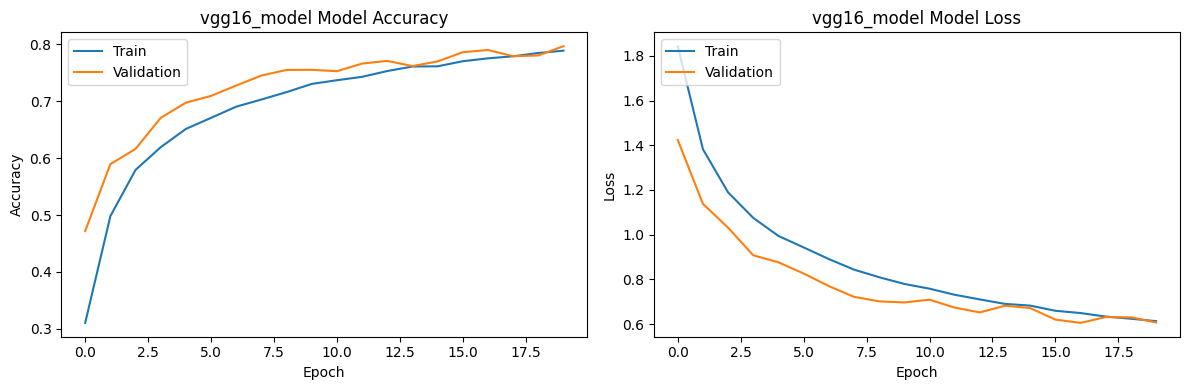

In [27]:
# Plot training history of VGG16
plot_training_history(history_vgg16, 'vgg16_model')

Test Accuracy: 0.7819
313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.93      0.88      0.90      1000
           2       0.72      0.64      0.68      1000
           3       0.61      0.57      0.59      1000
           4       0.74      0.75      0.75      1000
           5       0.70      0.68      0.69      1000
           6       0.79      0.88      0.83      1000
           7       0.81      0.83      0.82      1000
           8       0.85      0.89      0.87      1000
           9       0.86      0.89      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



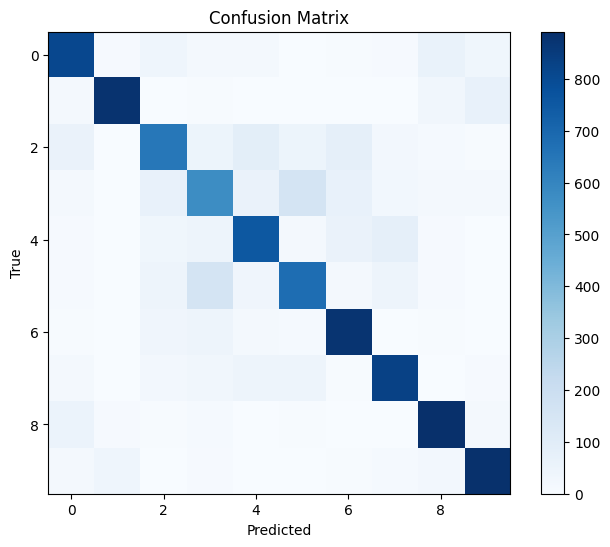

In [28]:
# Plot training history of VGG16
evaluate_model(vgg16_model, x_test, y_test)

## Comparisons

### LeNet5 Model

LeNet5 is the simplest model among the three. It contains only a few convolutional layers, which are sufficient for lower-resolution images but might struggle with the complex patterns and variety in CIFAR-10 images.

LeNet5's training accuracy is relatively low, peaking just above 60%, which suggests that the model is too simple to capture complex features in the data effectively. Same with the loss, it decreases steadily but remains high which indicates insufficient learning.


For the Class Performance, the F1 scores vary across different classes, and the confusion matrix shows considerable confusion between certain classes. For example, looking at the row for class 3 and the predicted columns, there appears to be substantial confusion with classes 0, 2, 5, and 8, indicating that the model frequently misclassifies class 3 as one of these other classes. This suggests that LeNet5 struggles to distinguish between similar color patterns and shapes, likely due to its limited feature extraction capabilities.


### AlexNet Model


AlexNet has more layers than LeNet5, including multiple convolutional layers and larger dense layers, which allow it to learn more complex features.

Looking at the Accuracy and Loss Trends, AlexNet achieves better validation accuracy than LeNet5, indicating a stronger ability to generalize. However, the gap between training and validation accuracy suggests some overfitting, possibly due to its deeper architecture which may memorize training data features that do not generalize well to unseen data.

The classification report for AlexNet shows improved performance across most classes compared to LeNet5, but some classes still show relatively low F1 scores. This improvement is because AlexNet can capture more detailed features, but it still struggles with some specific classes for similar reasons of color and pattern confusion.


### VGG16 Model
VGG16 is significantly deeper than both LeNet5 and AlexNet. It uses very small convolution filters (3x3), which allows it to build a very deep architecture with enhanced feature extraction capabilities.

The Accuracy and Loss Trends for this model shows the highest training and validation accuracy, indicating superior feature extraction and generalization capabilities. The relatively small gap towards the later epochs between training and validation accuracy compared to AlexNet suggests better handling of overfitting, despite its deeper network.


For Class Performance, VGG16 displays the most uniform and highest F1 scores across almost all classes. The confusion matrix also shows clearer distinction among classes, indicating its robustness in capturing distinctive features across various classes.


### Learning Insights
- The complexity and depth of a model significantly impact its ability to extract and learn from features in the dataset. VGG16’s small convolutional filters allow it to learn very detailed features at multiple scales.
- Models like AlexNet and VGG16 may need mechanisms such as dropout, batch normalization, or data augmentation to prevent overfitting and improve generalization.
- The choice of model depends on the task complexity and computational resources. LeNet5, being less computationally intensive, might be preferred for simpler tasks, whereas VGG16 fits complex image recognition tasks better despite its higher computational demand.